In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
!pip install eli5


In [ ]:
df=pd.read_csv('/content/full_gen_data.csv')

### Exploring The Data

In [ ]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [ ]:
df.shape

(100000, 24)

In [ ]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [ ]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
check(df)

,column,dtypes,nunique,sum_null
0,country,object,3,0
1,article,object,477,0
2,sales,int64,476,0
3,regular_price,float64,123,0
4,current_price,float64,141,0
5,ratio,float64,2722,0
6,retailweek,object,123,0
7,promo1,int64,2,0
8,promo2,int64,2,0
9,customer_id,float64,4549,0


In [ ]:
Categorical_columns = df.select_dtypes(include=['object'])
Numerical_columns = df.select_dtypes(exclude=['object'])

In [ ]:
 Numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,100000.0,56.781800,87.934743,1.000000,10.000000,26.000000,64.000000,898.00
regular_price,100000.0,52.391200,35.272128,3.950000,25.950000,40.950000,79.950000,197.95
current_price,100000.0,28.290800,22.578343,1.950000,11.950000,20.950000,37.950000,195.95
ratio,100000.0,0.545646,0.194363,0.296482,0.354839,0.525044,0.699248,1.00
promo1,100000.0,0.061900,0.240975,0.000000,0.000000,0.000000,0.000000,1.00
promo2,100000.0,0.004900,0.069829,0.000000,0.000000,0.000000,0.000000,1.00
customer_id,100000.0,2721.726500,1908.085499,1.000000,1017.000000,2091.000000,4570.250000,5999.00
cost,100000.0,6.517000,3.914728,1.290000,2.290000,6.950000,9.600000,13.29
rgb_r_main_col,100000.0,161.400000,39.790147,79.000000,138.000000,160.000000,205.000000,205.00
rgb_g_main_col,100000.0,139.600000,63.641814,26.000000,104.000000,144.000000,181.000000,238.00


In [ ]:
Categorical_columns.describe().T


,count,unique,top,freq
country,100000,3,Germany,49400
article,100000,477,BR3179,610
retailweek,100000,123,2015-11-22,1100
article.1,100000,10,OC6355,10000
productgroup,100000,4,SHOES,60000
category,100000,6,TRAINING,30000
style,100000,3,regular,50000
sizes,100000,2,"xxs,xs,s,m,l,xl,xxl",90000
gender,100000,4,women,70000


#### All columns is Numeric expcept [ country ,  article , retailweek , article.1  ,  productgroup  ,  category  ,  style  ,  sizes , gender ]


In [ ]:
df.duplicated().sum()


0

### Most important Features

<Axes: >

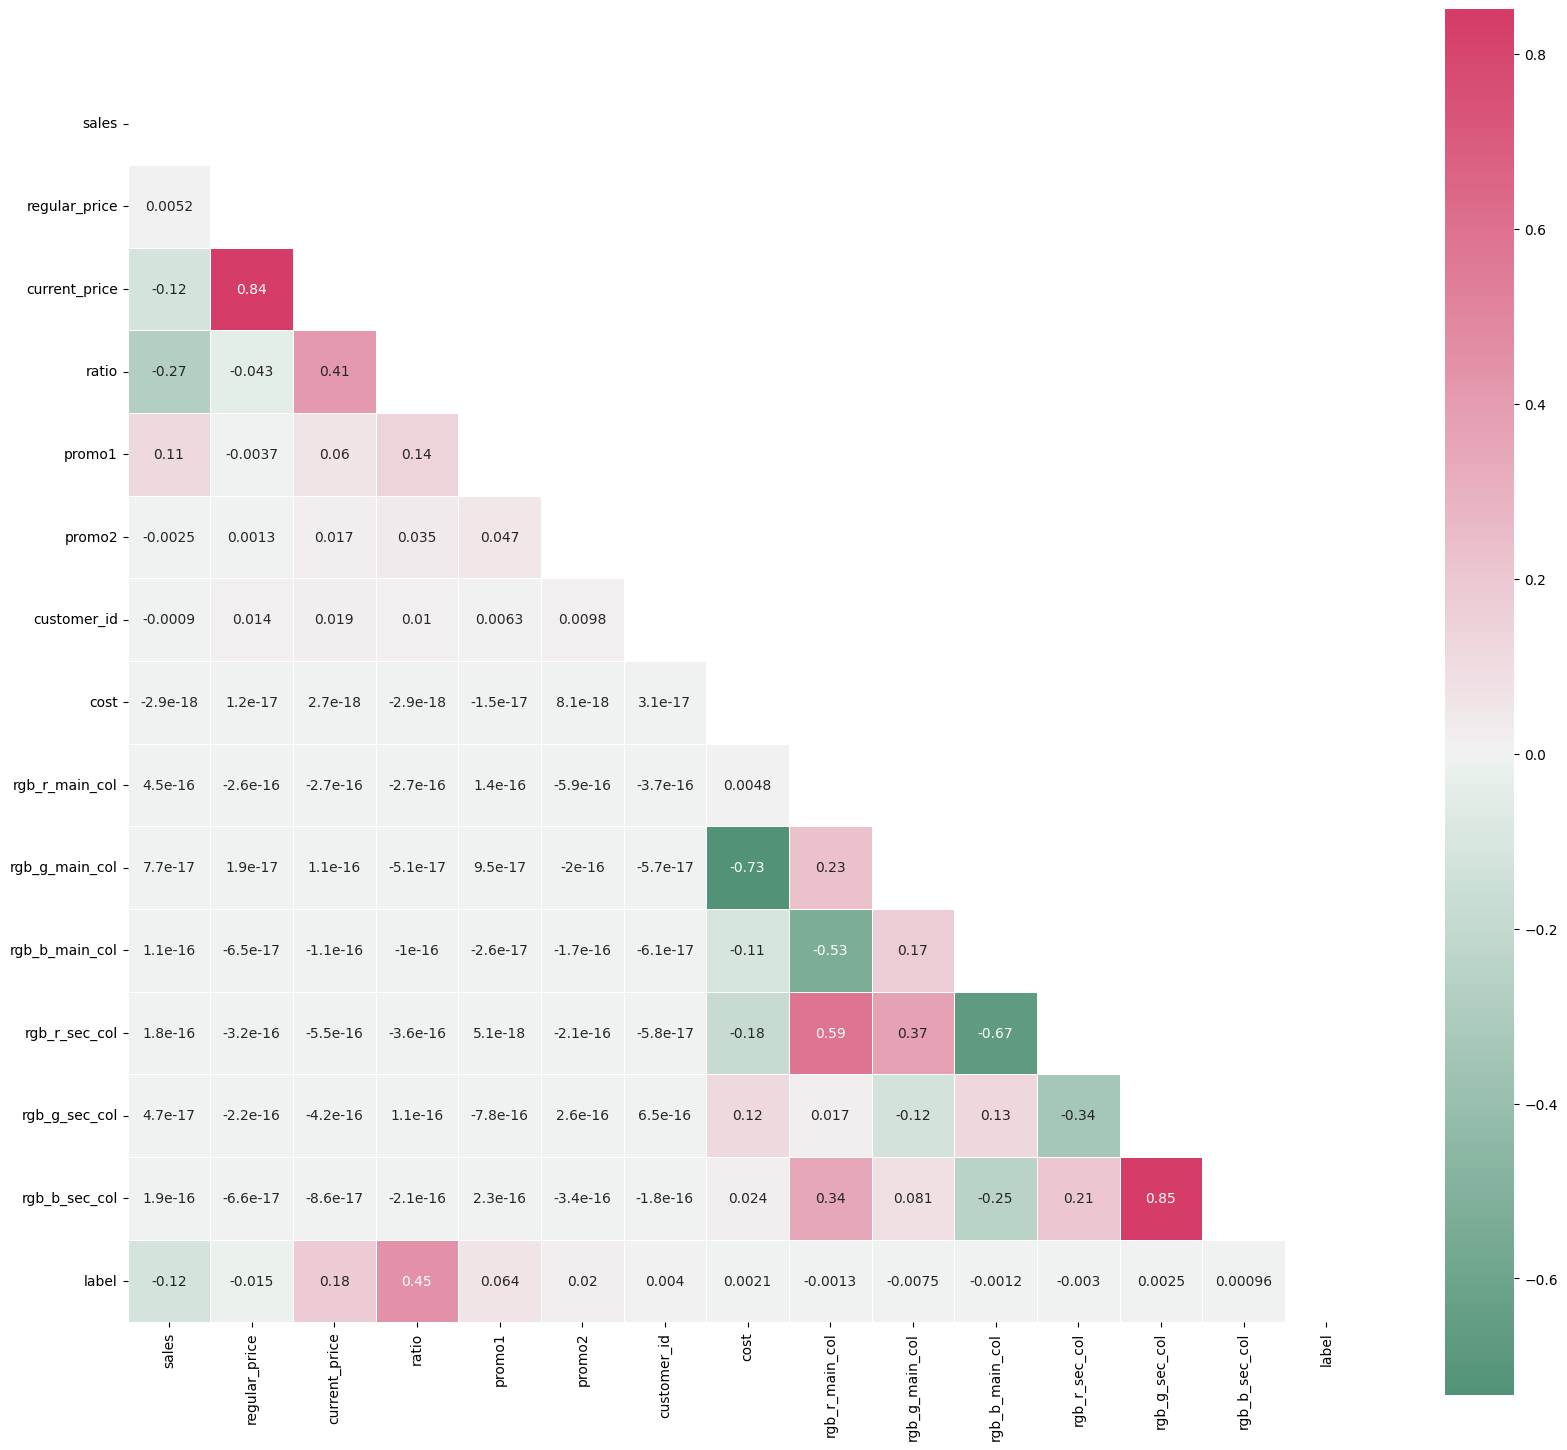

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df.drop('label', axis=1)
y = df['label']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['sales', 'regular_price', 'current_price', 'ratio', 'retailweek']
[0.03009927 0.15819479 0.12524219 0.13665102 0.30557431 0.16579728
 0.00881777 0.00164232 0.00788685 0.0042412  0.00619628 0.00792437
 0.00432569 0.00116591 0.00377344 0.00622246 0.00806398 0.00785819
 0.00346092 0.0033988  0.00346297]


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)

In [ ]:
eli5.show_weights(perm, feature_names = X.columns.tolist())


Weight,Feature
0.1273 ± 0.0001,ratio
0.0956 ± 0.0010,sales
0.0774 ± 0.0006,current_price
0.0768 ± 0.0014,retailweek
0.0715 ± 0.0009,regular_price
0.0531 ± 0.0012,country
0.0144 ± 0.0002,promo1
0.0065 ± 0.0003,cost
0.0048 ± 0.0002,rgb_g_main_col
0.0047 ± 0.0003,article.1


### How many people Buy our Products ?

In [ ]:
fig=px.pie(df,values=df["label"].value_counts(),
           names=["advertisement with customer buying"," without"],title="<b>advertisement with customer buying And without ",
           hole=.6,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

##### From a Technical perspective The label is imbalanced as it has

*   13.9% of people dont do advertising
*   86.1 do advertising
but from sales and marketing perspective its good that the iighest percentage of people do advertising  


#### The impact of sales over Time with promotions

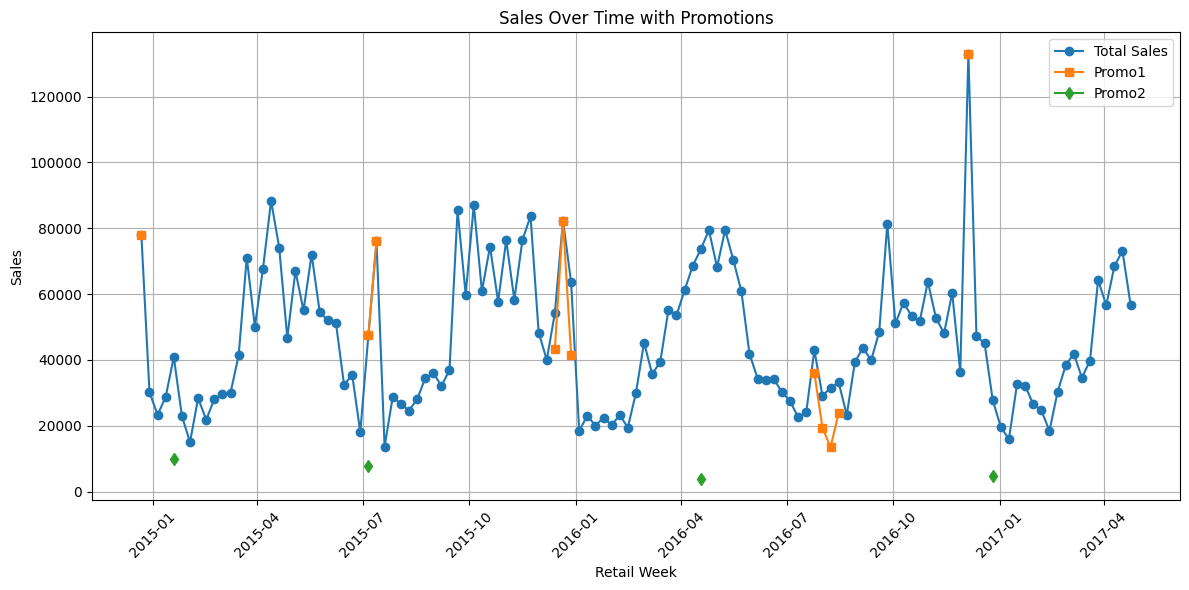

In [ ]:
df['retailweek'] = pd.to_datetime(df['retailweek'])

sales_by_week = df.groupby(df['retailweek'].dt.to_period('W'))['sales'].sum()

promo1_sales_by_week = df.groupby([df['retailweek'].dt.to_period('W'), 'promo1'])['sales'].sum().unstack()

promo2_sales_by_week = df.groupby([df['retailweek'].dt.to_period('W'), 'promo2'])['sales'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_week.index.to_timestamp(), sales_by_week.values, label='Total Sales', marker='o')
plt.plot(promo1_sales_by_week.index.to_timestamp(), promo1_sales_by_week[1], label='Promo1', marker='s')
plt.plot(promo2_sales_by_week.index.to_timestamp(), promo2_sales_by_week[1], label='Promo2', marker='d')

plt.title('Sales Over Time with Promotions')
plt.xlabel('Retail Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* ####   sales increase during promotional periods so it's a positive indicator of the effectiveness of our promotional strategies.


### How changes in regular and current prices affect sales

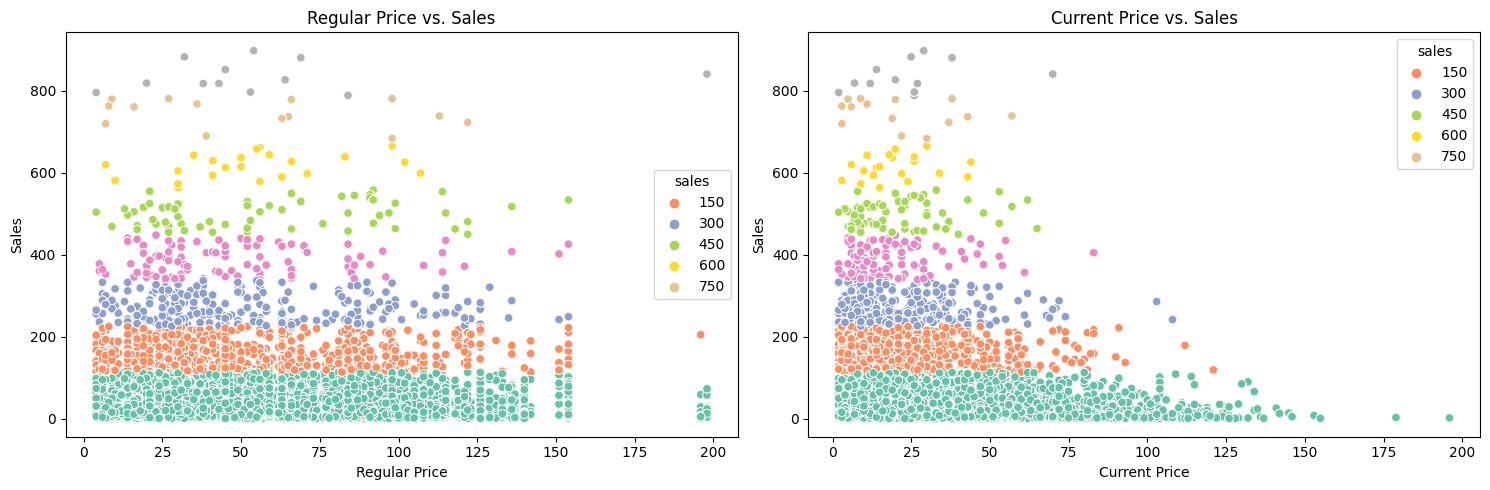

In [ ]:
palette = sns.color_palette("Set2", as_cmap=True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot: regular_price vs. sales
ax1.set_title('Regular Price vs. Sales')
ax1.set_xlabel('Regular Price')
ax1.set_ylabel('Sales')
sns.scatterplot(x=df['regular_price'], y=df['sales'], hue=df['sales'], palette=palette, ax=ax1)

# Second subplot: current_price vs. sales
ax2.set_title('Current Price vs. Sales')
ax2.set_xlabel('Current Price')
ax2.set_ylabel('Sales')
sns.scatterplot(x=df['current_price'], y=df['sales'], hue=df['sales'], palette=palette, ax=ax2)
plt.tight_layout()
plt.show()

they have the same effect on sales and it increase with both of them and that means  

*   there is a strong demand for the product
*   Customers might be willing to pay more for the product due to its popularity and unique features.



### The Most Popular Product

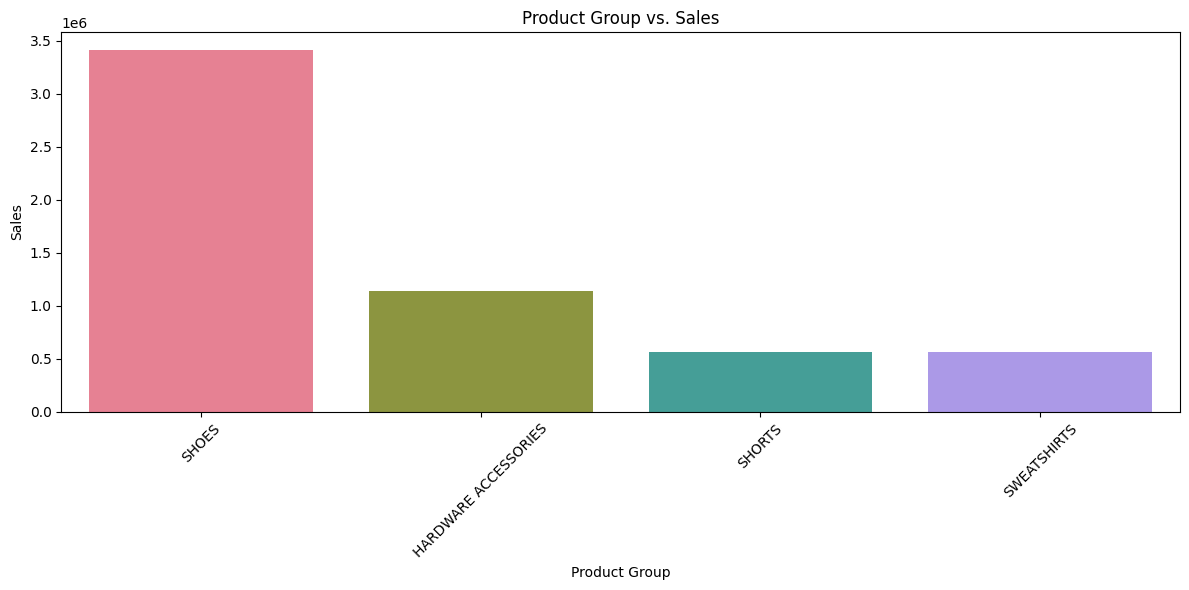

In [ ]:
plt.figure(figsize=(12, 6))
product_group_sales = df.groupby('productgroup')['sales'].sum().sort_values(ascending=False)
custom_palette = sns.color_palette("husl", n_colors=len(product_group_sales))
sns.barplot(x=product_group_sales.index, y=product_group_sales.values,palette=custom_palette)
plt.title('Product Group vs. Sales')
plt.xlabel('Product Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####  as we see the most popular Product that customers are interested in purchasing is Shoes

### How sales vary across different product categories.

In [ ]:
fig=px.box(data_frame=df,y="sales",x="category",color="label",
           color_discrete_sequence=[" #ff751a","#ff3399"],title="<b>sales Vs category withh label ")
fig.update_layout(template="plotly")

fig.show()

#### Sales Don't Vary Much that mean

* ####  Customers are purchasing products from various categories, indicating a balanced demand but the customers still dont buy that much as we said the data is imbalanced in the advertising process   



#### Which Gender interested to buy the product depending on colors ?

In [ ]:
grouped_df = df.groupby(['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'gender']).size().reset_index(name='count')

fig = px.histogram(grouped_df, x=['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col'], y='count', color='gender',
             barmode='group', labels={'rgb_r_main_col': 'Red', 'rgb_g_main_col': 'Green', 'rgb_b_main_col': 'Blue', 'count': 'Count'})

fig.update_layout(
    title="Effect of RGB Color on Gender",
    xaxis_title="RGB Color",
    yaxis_title="Count",
    font=dict(size=14),
    template="plotly"
)

fig.show()

In [ ]:
grouped_df = df.groupby(['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'gender']).agg({'label': 'mean'}).reset_index()

fig = px.scatter(grouped_df, x='rgb_r_main_col', y='label', color='gender', size='label',
                 labels={'rgb_r_main_col': 'Red', 'label': 'Mean Target'},
                 title="Effect of RGB Color on Gender and Target Label")

fig.update_layout(
    xaxis_title="RGB Red Channel",
    yaxis_title="Mean Target Label",
    font=dict(size=14),
    template="plotly"
)

fig.show()

* #### Women has the most interest in Colors and the product has more popularity with women

#### the best seller country with the best seller gender

In [ ]:
grouped_df = df.groupby(['country', 'gender'])['sales'].sum().reset_index()

fig = px.bar(grouped_df, x='country', y='sales', color='gender',
             barmode='group', labels={'France': 'Red', 'Germany': 'Green', 'Austria': 'Blue', 'sales': 'Total Sales'})

fig.update_layout(
    title="the best buyer country with the best buyer gender",
    xaxis_title="Country",
    yaxis_title="Total Sales",
    font=dict(size=14),
    template="plotly"
)

fig.show()

#### The best buyer country ia Germany and women is the best buyer Gender

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

###Preprocessing

In [ ]:
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

country              2.000000
article            241.000000
sales               54.000000
regular_price       54.000000
current_price       26.000000
ratio                0.344409
retailweek          62.000000
promo1               0.000000
promo2               0.000000
customer_id       3553.250000
article.1            5.000000
productgroup         0.000000
category             4.000000
cost                 7.310000
style                2.000000
sizes                0.000000
gender               1.000000
rgb_r_main_col      67.000000
rgb_g_main_col      77.000000
rgb_b_main_col     148.000000
rgb_r_sec_col       91.000000
rgb_g_sec_col       56.000000
rgb_b_sec_col      100.000000
label                0.000000
dtype: float64


In [ ]:
df=df.drop(['article','customer_id'],axis=1)

#### Discovering Most important Features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='label']
y = df[['label']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['sales', 'regular_price', 'current_price', 'ratio', 'retailweek',
       'promo1', 'promo2', 'rgb_g_main_col', 'rgb_b_main_col',
       'rgb_r_sec_col'],
      dtype='object')


#### Discovering Outliers

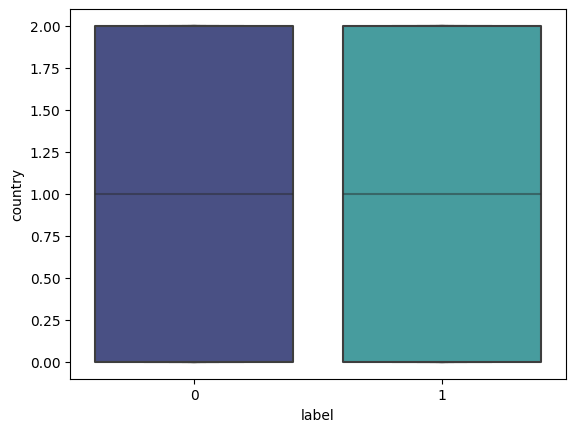

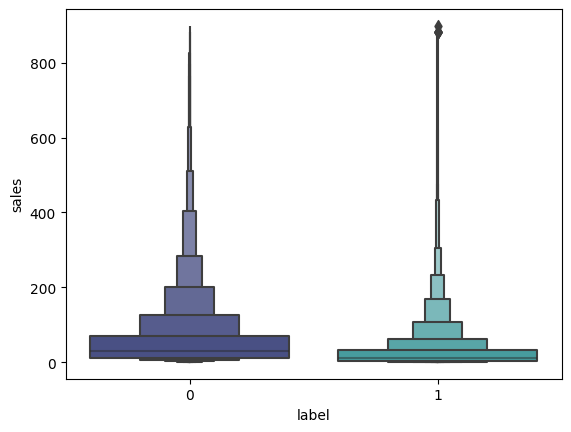

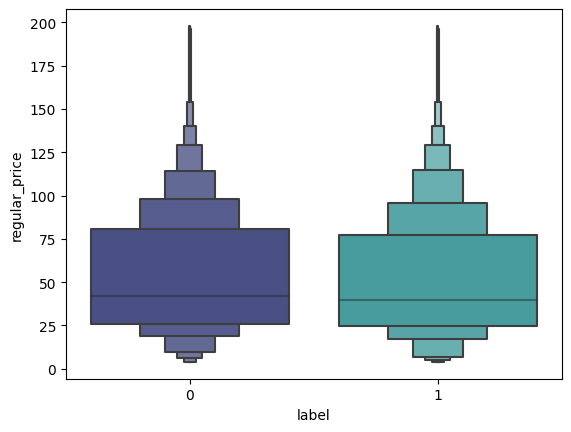

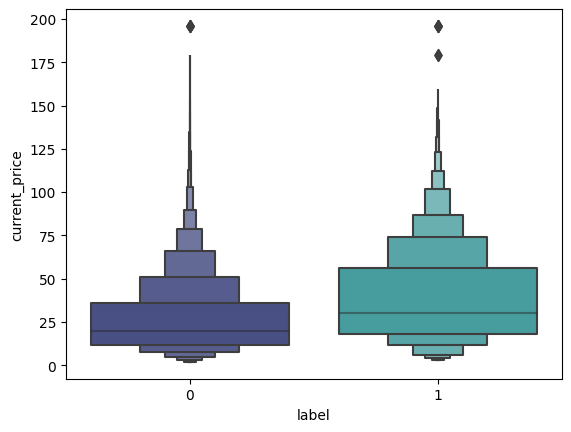

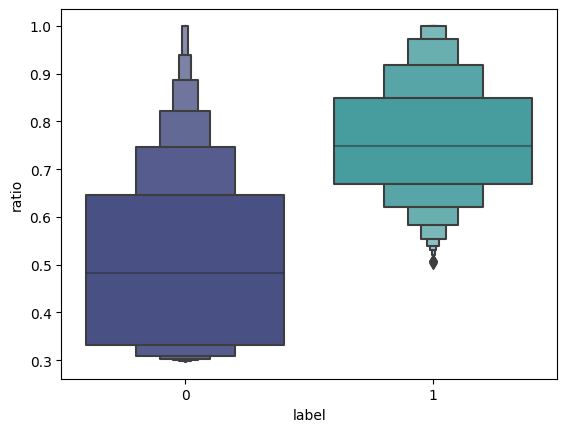

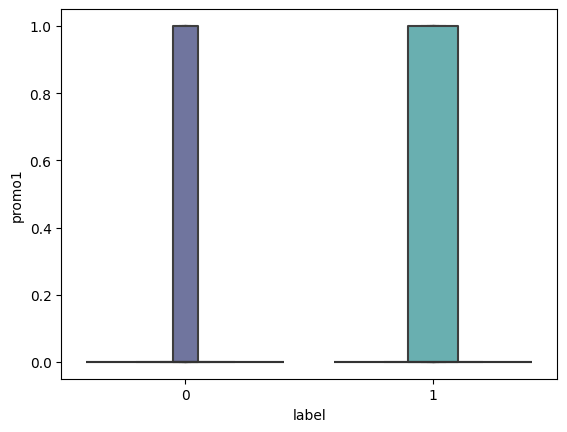

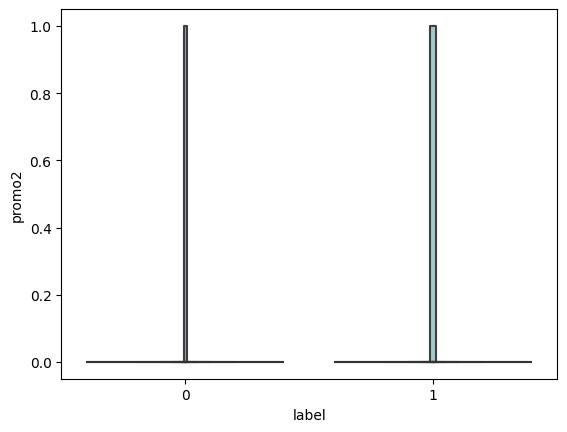

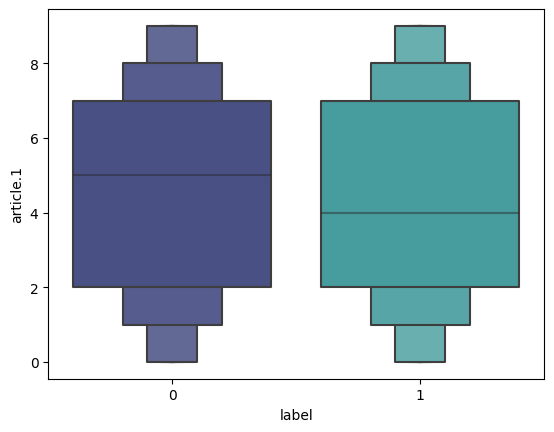

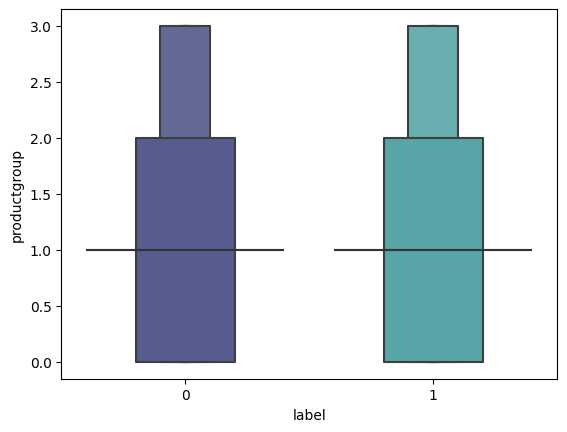

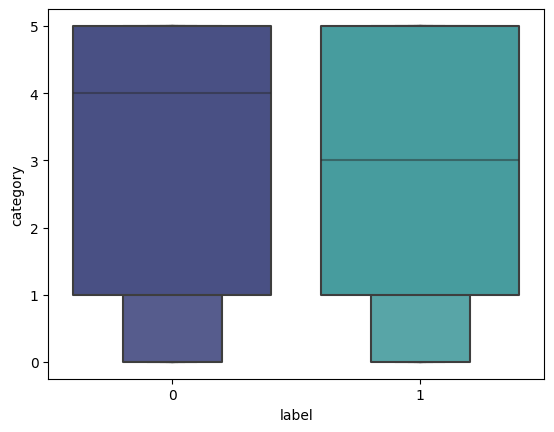

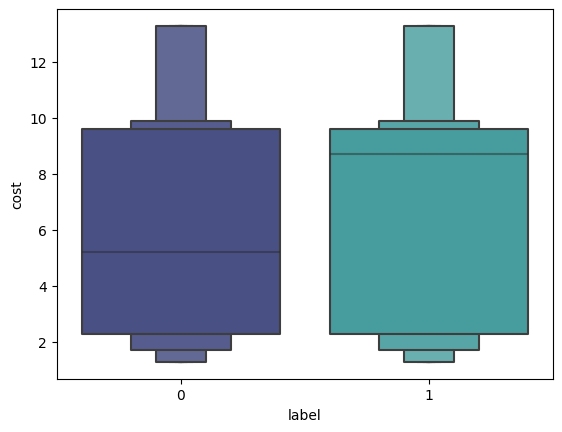

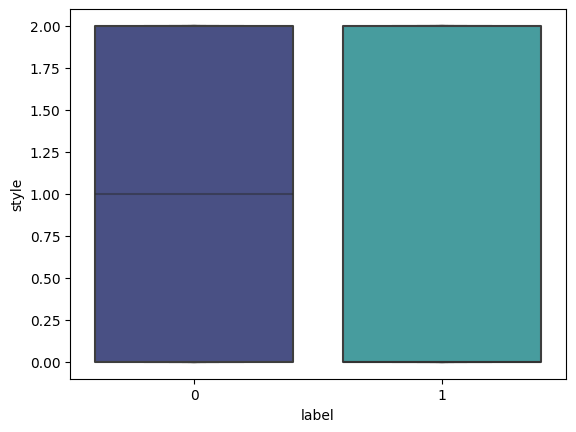

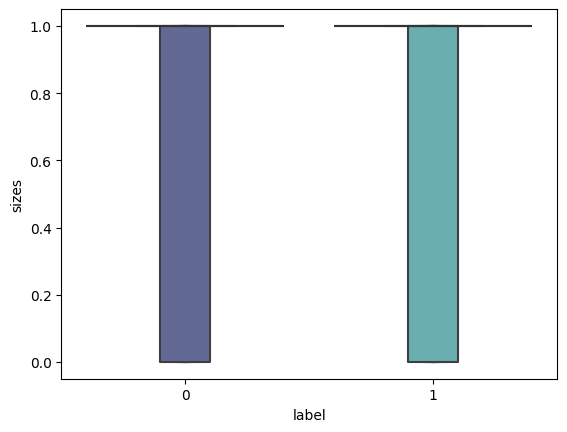

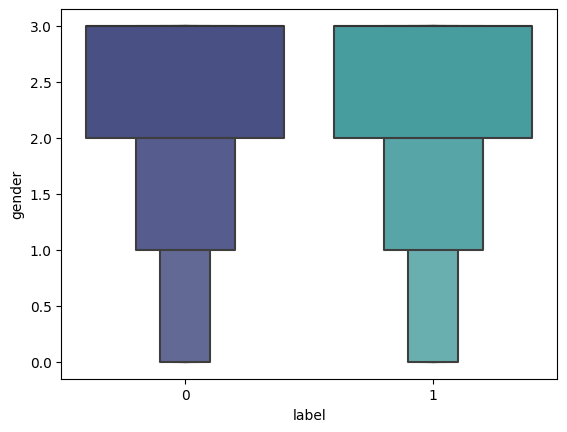

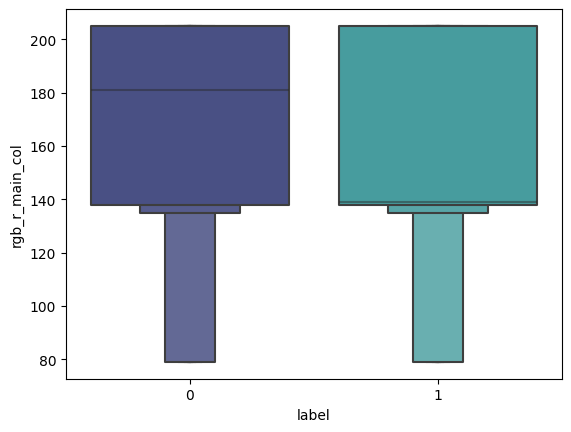

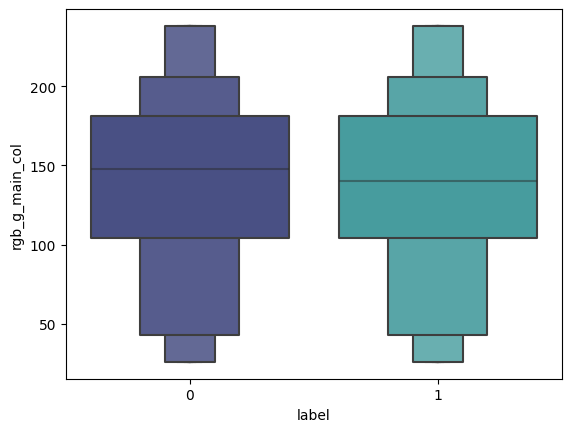

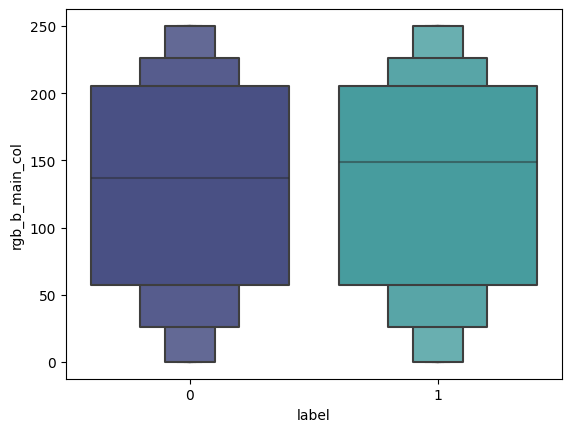

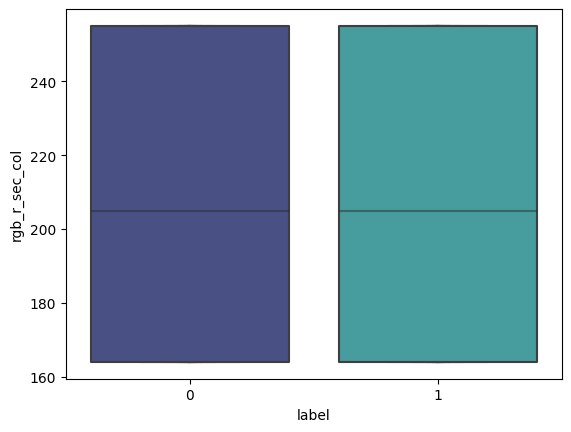

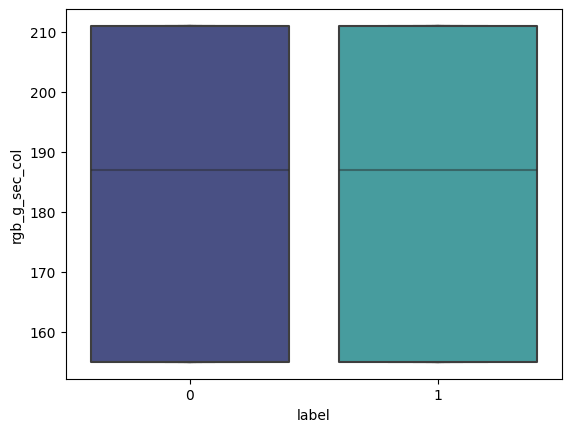

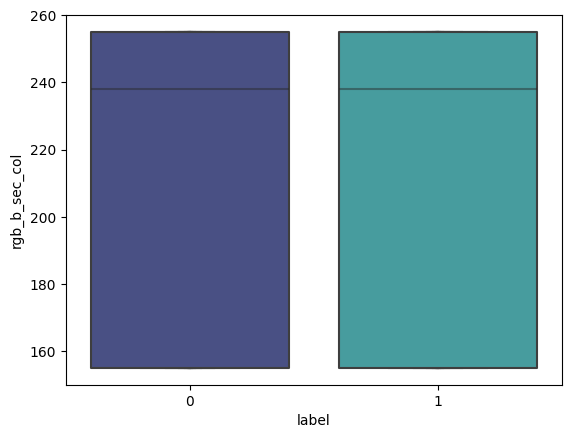

In [ ]:
numeric_data = df.select_dtypes(['float64','int64'])
for col in numeric_data.columns[:-1]:
    plt.figure()
    sns.boxenplot(data=df, x=df['label'], y=col,palette="mako")
    plt.show()

In [ ]:
df.head()

,country,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,article.1,productgroup,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,2,28,5.95,3.95,0.663866,65,0,0,6,1,...,1,1,3,205,104,57,255,187,255,0
1,2,28,5.95,3.95,0.663866,65,0,0,1,2,...,0,1,3,188,238,104,255,187,255,0
2,2,28,5.95,3.95,0.663866,65,0,0,2,0,...,0,1,3,205,173,0,255,187,255,0
3,2,28,5.95,3.95,0.663866,65,0,0,5,1,...,0,1,0,205,140,149,164,211,238,0
4,2,28,5.95,3.95,0.663866,65,0,0,4,1,...,0,1,3,138,43,226,164,211,238,0


In [ ]:
y=df['label']
X=df.drop('label',axis=1)

#### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(X_over,y_over, test_size= 0.2 , random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(137715, 23)
(34429, 23)
(137715,)
(34429,)


#### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Modeling and Evaluation

Accuracy: 0.9372912370385431

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     17072
           1       0.89      1.00      0.94     17357

    accuracy                           0.94     34429
   macro avg       0.94      0.94      0.94     34429
weighted avg       0.94      0.94      0.94     34429



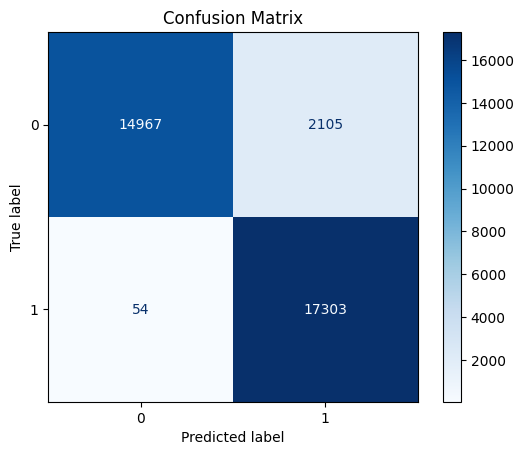

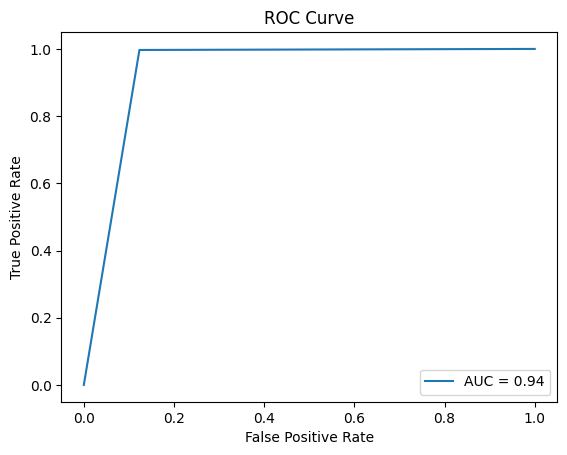

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()

history = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
roc_display.plot()
plt.title('ROC Curve')
plt.show()


Accuracy: 0.9477765836939789

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     17072
           1       0.91      1.00      0.95     17357

    accuracy                           0.95     34429
   macro avg       0.95      0.95      0.95     34429
weighted avg       0.95      0.95      0.95     34429



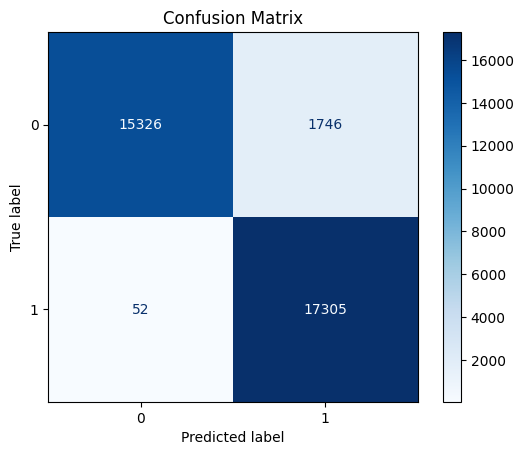

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

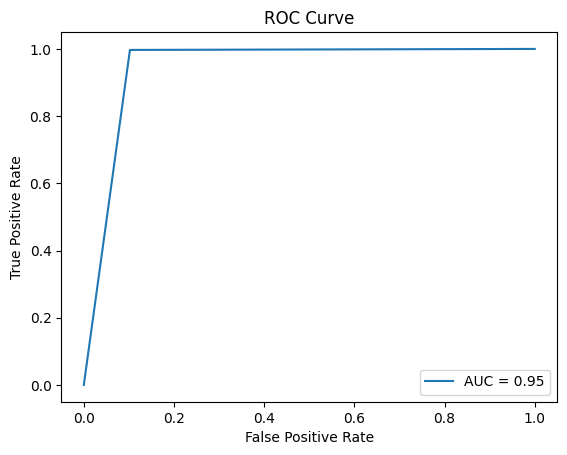

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
roc_display.plot()
plt.title('ROC Curve')
plt.show()

0.9372912370385431
Accuracy: 0.9372912370385431

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     17072
           1       0.89      1.00      0.94     17357

    accuracy                           0.94     34429
   macro avg       0.94      0.94      0.94     34429
weighted avg       0.94      0.94      0.94     34429



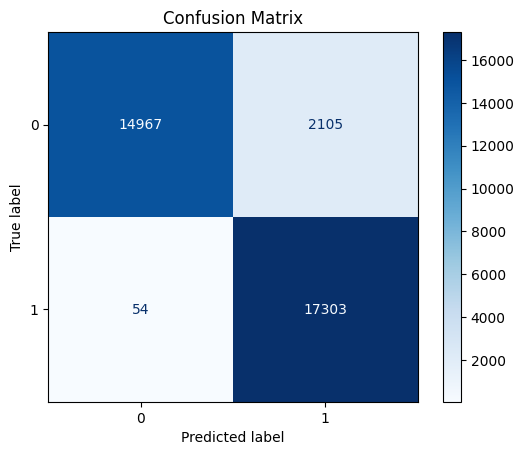

In [ ]:
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }


xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train, y_train)
xgb_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

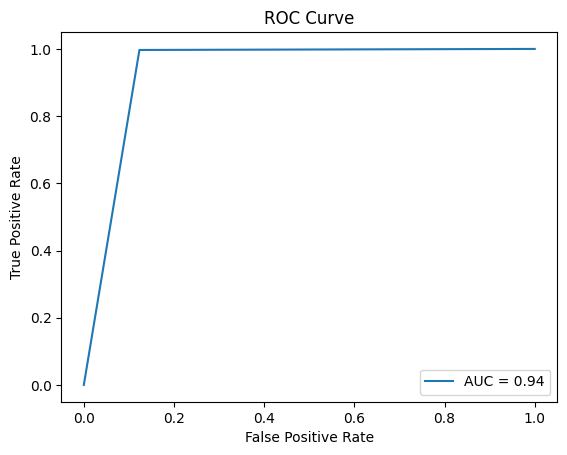

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
roc_display.plot()
plt.title('ROC Curve')
plt.show()

0.7860234104969648

Accuracy: 0.7860234104969648

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     17072
           1       0.77      0.82      0.79     17357

    accuracy                           0.79     34429
   macro avg       0.79      0.79      0.79     34429
weighted avg       0.79      0.79      0.79     34429



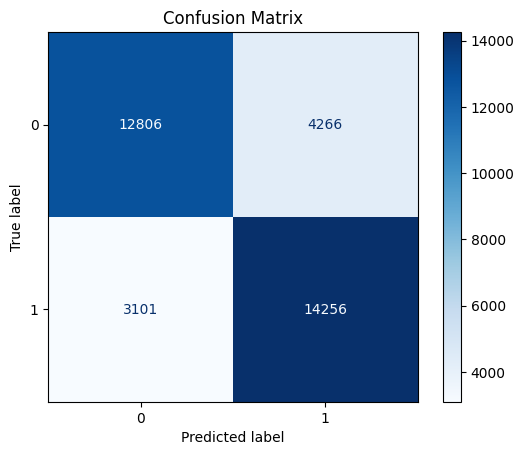

In [ ]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

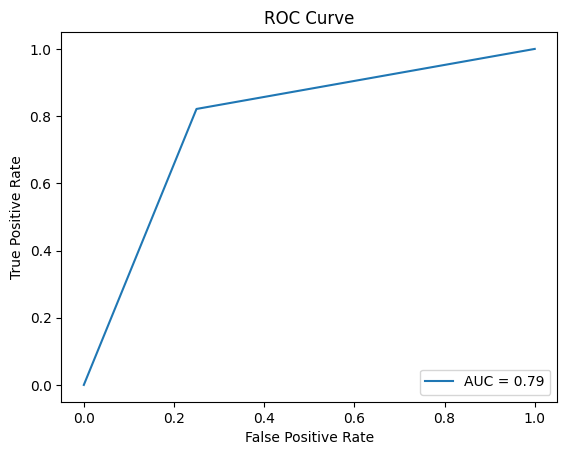

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
roc_display.plot()
plt.title('ROC Curve')
plt.show()

0.9261959394696332

Accuracy: 0.9261959394696332

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     17072
           1       0.89      0.98      0.93     17357

    accuracy                           0.93     34429
   macro avg       0.93      0.93      0.93     34429
weighted avg       0.93      0.93      0.93     34429



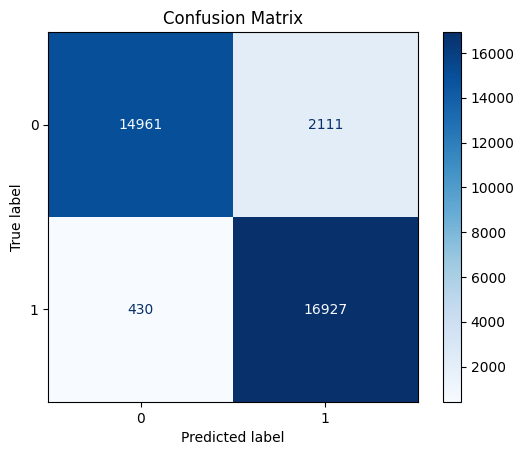

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

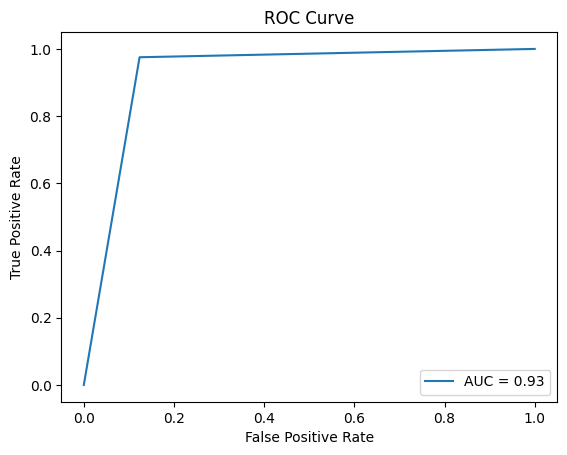

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
roc_display.plot()
plt.title('ROC Curve')
plt.show()

In [ ]:
!pip install tabulate
from tabulate import tabulate
col_names = ["Models","Percentage","knn", "DecisionTree"," RandomForest","LogisticRegression","xgboost","SVM"]

In [ ]:
data = [["knn", 0.92],
        ["DecisionTree", 0.93],
        ["RandomForest", 0.94],
        ["LogisticRegression", 0.78],
        ["xgboost", 0.93]]

In [ ]:
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


╒════════════════════╤══════════════╕
│ Models             │   Percentage │
╞════════════════════╪══════════════╡
│ knn                │         0.92 │
├────────────────────┼──────────────┤
│ DecisionTree       │         0.93 │
├────────────────────┼──────────────┤
│ RandomForest       │         0.94 │
├────────────────────┼──────────────┤
│ LogisticRegression │         0.78 │
├────────────────────┼──────────────┤
│ xgboost            │         0.93 │
╘════════════════════╧══════════════╛
